### 선형 회귀분석(Linear Regression)
##### - 독립 변수(x)가 종속변수(y)에 얼마나 영향을 주는지 인과관계를 분석.
##### - 독립변수(x) - 연속형, .....종속변수(y) - 연속형.
##### - 두 변수는 상관관계 및 인과관계가 있어야한다. (상관계수 > 0.3)
##### - 머신러닝의 지도학습 : 학습(fit)을 통해 모델 생성 후, 
##### ....새로운 데이터에 대한 예측 및 분류(predict)

In [1]:
""" 
<선형회귀분석의 충족 조건>
1. 선형성     : 독립변수(독립변수를 feature라는 용어사용)의 
                변화에 따라 종속변수도 "일정 크기로 변화"해야 한다.
2. 정규성     : 잔차항이 "정규분포"를 따라야 한다.
3. 독립성     : 독립변수의 값이 서로 관련되지 않아야 한다.
4. 등분산성   : 그룹간의 분산이 유사해야 한다. 
                독립변수의 모든 값에 대한 오차들의 분산은 일정해야 한다.
5. 다중공선성 : 다중회귀 분석 시 3 개 이상의 독립변수 간에 
                강한 상관관계가 있어서는 안된다. 
"""

' \n<선형회귀분석의 충족 조건>\n1. 선형성     : 독립변수(독립변수를 feature라는 용어사용)의 \n                변화에 따라 종속변수도 "일정 크기로 변화"해야 한다.\n2. 정규성     : 잔차항이 "정규분포"를 따라야 한다.\n3. 독립성     : 독립변수의 값이 서로 관련되지 않아야 한다.\n4. 등분산성   : 그룹간의 분산이 유사해야 한다. \n                독립변수의 모든 값에 대한 오차들의 분산은 일정해야 한다.\n5. 다중공선성 : 다중회귀 분석 시 3 개 이상의 독립변수 간에 \n                강한 상관관계가 있어서는 안된다. \n'

### exe-1) 임의 데이터를 이용하여 선형회귀분석 테스트

In [3]:
### 사용할 라이브러리 불러오기

import numpy.linalg as lin
import numpy as np
import matplotlib.pyplot as plt

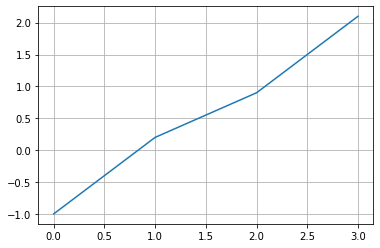

In [4]:
### 데이터 생성하기
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

### 선형 그래프 시각화하기
plt.plot(x, y)
plt.grid(True)
plt.show()

x = 
 [0 1 2 3]
----------------------------------
np.ones(len(x)) = 
 [1. 1. 1. 1.]
----------------------------------
np.vstack([x, np.ones(len(x))]) = 
 [[0. 1. 2. 3.]
 [1. 1. 1. 1.]]
----------------------------------
A = 
 [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
----------------------------------
기울기 : 0.9999999999999999  y절편: -0.9499999999999995
----------------------------------


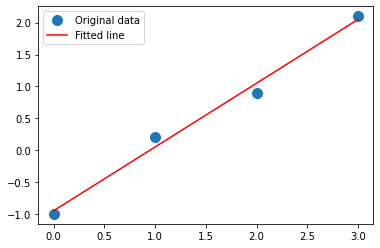

In [14]:
A = np.vstack([x, np.ones(len(x))]).T

print("x = \n", x)
print("----------------------------------")

# np.ones(x) : 1로 채워진 행렬 생성
print("np.ones(len(x)) = \n", np.ones(len(x)))
print("----------------------------------")

# np.vstack(x, y) : x에 y 행 추가 (2차원 리스트가 만들어짐)
print("np.vstack([x, np.ones(len(x))]) = \n", 
          np.vstack([x, np.ones(len(x))]))
print("----------------------------------")

# A = ().T : 전치 (행과 열을 변경 한다 - 2차원 행렬 생성)
print("A = \n", A)
print("----------------------------------")

### 알고리즘(직선의 방정식) : y = ax + b
# - y : 예측값(학습 시 종속변수를 사용, 수집데이터)
# - x : 관측값(학습 시 독립변수를 사용, 
#       테스트 시에는 임의 값 사용, 수집데이터)
# - a : 기울기 값(함수를 이용하여 추출)
# - b : y절편 값(함수를 이용하여 추출)
# 알고리즘을 통해 y값을 예측하는 것이 목적이다.

### 기울기값(a)와 y절편값 추출하기
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
print('기울기 :', a, ' y절편:', b) 
print("----------------------------------")

### 선 그래프로 시각화 하기..
# 수집 데이터를 이용한 표시
plt.plot(x, y, 'o', label='Original data', markersize=10)

# Fitted line : 회귀 추세선
plt.plot(x, a*x + b, 'r', label='Fitted line')

plt.legend()
plt.show()

In [23]:
### 모델 생성하기

### <선형 회귀분석 모델 생성방법 4가지>
## 1. make_regression() 함수를 이용한 방법
#  - 모델은 생성할 수 없으며, 알고리즘의 기울기와 y절편값을 확인만 가능
#  - 모델을 생설할 수 없기 때문에 학습(fit()) 및 예측(predict()) 
#    함수를 지원하지 않음
#  - 직접 회귀식(y=a * x + b)을 이용해서 계산해야함
#  - 직접 계산에 의해 y값을 예측할 수 있다.

## 2. Linear Regression() 함수를 이용하는 방법
#  - 모델을 생성할 수 있다.
#  - 학습(fit()) 및 예측(predict()) 함수 사용 가능

## 3. statsmodels의 smf 라이브러리의 ols() 함수를 이용하는 방법
#  - 단순선형 회귀분석 및 다중회귀분석에 사용됨
#  - 모델을 생성할 수 있다.
#  - 학습(fit()) 및 예측(predict()) 함수 사용 가능
#  *** [단순선형 및 다중선형 회귀분석]에서 사용되는 모델임 ***

## 4. scipy의 stats 라이브러리의 linregress() 함수 사용 가능
#  - 모델은 생성할 수 있으나, 알고리즘의 기울기와 y절편값을 확인만 가능
#  - 학습(fit()) 및 예측(predict()) 함수를 지원하지 않으며,
#  - numpy 라이브러이의 polyval() 함수를 이용하여 예측이 가능함
#  - polyval(기울기, y절편, 테스트에 사용할 독립변수)


### 1. make_regression() 함수를 이용한 방법

In [ ]:
### 1. make_regression() 함수를 이용한 방법
#  - 모델은 생성할 수 없으며, 알고리즘의 기울기와 y절편값을 확인만 가능
#  - 모델을 생설할 수 없기 때문에 학습(fit()) 및 예측(predict()) 
#    함수를 지원하지 않음
#  - 직접 회귀식(y=a * x + b)을 이용해서 계산해야함
#  - 직접 계산에 의해 y값을 예측할 수 있다.

In [21]:
# 사용할 라이브러리
import statsmodels.api as sm
from sklearn.datasets import make_regression
import numpy as np

In [22]:
### 모델 생성
# seed(12) : 랜덤값 생성시 12값 seed로 고정
np.random.seed(12)

# make_regression() 모델 생성 
#  : 50개의 독립변수(1개), 종속변수(1개) 생성
# - n_samples : 샘플 데이터 50개 생성
# - n_features : 독립변수 1개 생성
# - bias : y절편 값
# - coef : 기울기 값을 출력할지 여부
# - 결과값 
#   : x(독립변수), y(종속변수), coef(기울기)
x, y, coef = make_regression(n_samples=50, 
                             n_features=1, 
                             bias=100, 
                             coef=True)

# x(독립변수)
print("x = \n", x)
print("----------------------")

# x(독립변수)
print("y = \n", y)
print("----------------------")

# coef(기울기)
print("기울기(coef) = \n", coef)
print("----------------------")

### 회귀식 완성 :  y = ax + b
#    y = 89.47430739278907 * x + 100 

### 직접 계산에 의한 예측하기
# - 테스트 값 = 독립변수 -1.70073563 값 사용 
# - 예측값은 -52.17214291 이 나와야 한다.
y_pred = 100 + 89.47430739278907  * -1.70073563
print('예측값(y) :', y_pred)

x = 
 [[-1.70073563]
 [-0.67794537]
 [ 0.31866529]
 [ 0.13884618]
 [ 0.53513589]
 [-0.03920917]
 [ 0.03541635]
 [-0.71385629]
 [-0.11491994]
 [ 1.01251548]
 [ 2.24181779]
 [ 0.00512708]
 [-1.02953021]
 [-0.64743078]
 [ 0.47298583]
 [-1.2151688 ]
 [-0.25390408]
 [-0.3843588 ]
 [ 0.52733267]
 [ 0.47245699]
 [-0.91386915]
 [ 0.5018723 ]
 [-0.68142588]
 [-2.21333348]
 [-0.12214979]
 [-0.57188106]
 [ 1.34235637]
 [-1.15436024]
 [-0.58526828]
 [-3.14741652]
 [ 0.21497595]
 [-1.68175651]
 [-0.80698188]
 [ 1.20979645]
 [ 1.09595612]
 [-0.59782292]
 [-0.99720384]
 [-0.52840432]
 [-0.12022767]
 [ 0.07325207]
 [-0.10586232]
 [ 0.75314283]
 [ 0.2424395 ]
 [-2.21853495]
 [-1.78809425]
 [ 2.87181939]
 [ 1.33583134]
 [-1.53472134]
 [ 0.64076111]
 [-0.33759525]]
----------------------
y = 
 [ -52.17214291   39.34130801  128.51235594  112.42316554  147.88091341
   96.49178624  103.16885304   36.12820309   89.71761789  190.59412103
  300.58509445  100.45874176    7.88349776   42.07157936  142.32007968
 

### 2. Linear Regression() 함수를 이용하는 방법

In [25]:
### 2. Linear Regression() 함수를 이용하는 방법
#  - 모델을 생성할 수 있다.
#  - 학습(fit()) 및 예측(predict()) 함수 사용 가능

In [26]:
### 사용할 라이브러리 불러오기

from sklearn.linear_model import LinearRegression

In [27]:
### 데이터 생성하기
# - 위에서 사용한 독립변수(x) 및 종속변수(y) 값 사용
xx = x
yy = y

### 모델 객체 생성하기 : LinearRegression()
model = LinearRegression()

### 학습모델 생성하기 : fit()
# 학습 데이터로 모형 추정 : y절편, 기울기 추출
fit_model = model.fit(xx, yy) 

# 기울기 89.47430739
print("기울기 = ", fit_model.coef_)   
print("-------------------------------")

# y절편 100.0
print("y절편 = ", fit_model.intercept_) 
print("-------------------------------")

### 예측모델 테스트 : predict()

# 예측값(y) 확인하기
y_pred2 = fit_model.predict(xx[[0]])
print('y_pred2 :', y_pred2)
print("-------------------------------")

# 예측값(y) 확인하기
y_pred2_new = fit_model.predict([[66]])
print('y_pred2_new :', y_pred2_new)

기울기 =  [89.47430739]
-------------------------------
y절편 =  100.0
-------------------------------
y_pred2 : [-52.17214291]
-------------------------------
y_pred2_new : [6005.30428792]


### 3. statsmodels의 smf  라이브러리의 ols() 함수를 이용하는 방법
##### - 단순선형 회귀분석 및 다중회귀분석에 사용됨

In [28]:
### 3. statsmodels의 smf 라이브러리의 ols() 함수를 이용하는 방법
#  - 단순선형 회귀분석 및 다중회귀분석에 사용됨
#  - 모델을 생성할 수 있다.
#  - 학습(fit()) 및 예측(predict()) 함수 사용 가능

In [29]:
### 사용할 라이브러리 불러오기
import statsmodels.formula.api as smf
import pandas as pd

In [47]:
### 데이터 생성하기

# - 데이터는 위에서 사용한 xx 및 yy 값 사용
# - 독립변수(x)의 값의 경우 2차원 리스트에서 1차원으로 축소하여,
#   x 및 y 컬럼을 가지는 데이터프레임 형태로 구성해야함
# - 따라서, x값은 차원을 축소해야함 : flatten()함수 사용

### 차원축소
x1 = xx.flatten() 
print("독립변수(x1), x1.shape(차원확인) = \n", x1.shape)   
print("-------------------------------")

y1 = yy
print("종속변수(y1) = \n", y1)   
print("-------------------------------")

data = np.array([x1, y1])

### 데이터프레임 형태로 : 데이터 생성하기
df = pd.DataFrame(data.T)
df.columns = ['x1', 'y1']
print("생성된 데이터(df) 확인 = \n", df.head(3))   
print("-------------------------------")

### 학습모델 생성하기
#  - 모델 객체 생성 : smf.ols()
#  - 학습모델 생성 : fit()
#  - 아래는 객체 생성과 학습모델 생성을 한번에 처리하였음
#  - formula(학습 데이터) = '종속변수 ~ 독립변수'
model2 = smf.ols(formula='y1 ~ x1', data=df).fit()

### 학습모델 결과 확인하기
# - R-squared : 결정계수(1에 까가울 수록 학습모델이 좋은 것임)
# - Adj. R-squared : 수정결정계수(1에 까가울 수록 학습모델이 좋은 것임)
# - *** 독립변수가 많을 경우 R-squared과 Adj. R-squared의 차이가 클 경우 
#       독립변수 [이상치를 확인]해야한다. ***

# - x1의 p-value : 0.000 < 0.05 => 모델은 유효하다.
# - x1의 std err(표준 오차) : 7.29e-15 = 0.0000
# - x1의 Intercept(y절편) : 100.0000
# - x1의 coef(기울기) : 89.4743
# - x1의 Kurtosis(첨도) : 6.605 => 일반적으로 3보다 클경우,
#   평균에 데이터가 몰려있다고 판단한다.
#   kurtosis() 첨도는 확률분포에서 분포의 [뾰족한 정도]를 나타내는 [척도]입니다. 
#   --> 첨도가 높은 경우: 데이터의 분포가 평균(혹은 중심)에 많이 몰려 있어 뾰족하다
print("학습모델 결과 = \n", model2.summary())  
print("-------------------------------")

print("표준오차(std err) : 7.29e-15 = {:.9f}".format(7.29e-15))
print("-------------------------------")

### 예측값 확인 함수
# 예측에 사용할 독립변수 : [-1.70073563 -0.67794537]   
print("예측에 사용할 독립변수 = \n", x1[:2]) 
print("-------------------------------")

# 예측(테스트)을 위해서는 사용할 독립변수도
#  - 데이터프레임 형태로 구성해야 함
# 기존 자료로 검증하기 위해 독립변수의 추출값을 데이터프레임으로 구성
new_df = pd.DataFrame({'x1':[-1.70073563, -0.67794537]}) 

### 예측하기 : predict(테스트 데이터(x))
new_pred = model2.predict(new_df)
print('예측결과(new_pred) :\n', new_pred)   
print("-------------------------------")

new2_df = pd.DataFrame({'x1':[123, -2.34567]}) # 새로운 값에 대한 예측 결과 확인
new2_pred = model2.predict(new2_df)
print('예측결과(new_pred) :\n', new2_pred)

독립변수(x1), x1.shape(차원확인) = 
 (50,)
-------------------------------
종속변수(y1) = 
 [ -52.17214291   39.34130801  128.51235594  112.42316554  147.88091341
   96.49178624  103.16885304   36.12820309   89.71761789  190.59412103
  300.58509445  100.45874176    7.88349776   42.07157936  142.32007968
   -8.72638684   77.28210847   65.60976235  147.18272498  142.27276227
   18.23219105  144.90467678   39.0298914   -98.0364801    89.07073235
   48.8313381   220.10640661   -3.28558253   47.63352619 -181.61291334
  119.23482409  -50.47399897   27.79585534  208.24569942  198.05991459
   46.51020834   10.77587732   52.72138937   89.24271248  106.55417864
   90.52804266  167.38693344  121.69210605  -98.50187763  -59.98849467
  356.95405132  219.52258382  -37.31812896  157.33165682   69.79389882]
-------------------------------
생성된 데이터(df) 확인 = 
          x1          y1
0 -1.700736  -52.172143
1 -0.677945   39.341308
2  0.318665  128.512356
-------------------------------
학습모델 결과 = 
                   

### 4. scipy의 stats 라이브러리의 linregress() 함수 사용 가능

In [32]:
## 4. scipy의 stats 라이브러리의 linregress() 함수 사용 가능
#  - 모델은 생성할 수 있으나, 알고리즘의 기울기와 y절편값을 확인만 가능
#  - 학습(fit()) 및 예측(predict()) 함수를 지원하지 않으며,
#  - numpy 라이브러이의 polyval() 함수를 이용하여 예측이 가능함
#  - polyval(기울기, y절편, 테스트에 사용할 독립변수)

In [33]:
### 사용할 라이브러리 불러들이기

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
### 데이터 생성하기
# - data 폴더의 score_iq.csv 파일 사용
# - IQ가 점수(score)에 영향을 미치는지 예측

score_iq = pd.read_csv('./data/score_iq.csv')
print(score_iq.head(3))  
print("-------------------------------")
print(score_iq.info())

# iq가 score에 영향을 주는 지 검정
# iq로 score(시험점수) 값 예측

### 독립변수(x) 및 종속변수(y) 생성하기
x = score_iq.iq
y = score_iq.score

     sid  score   iq  academy  game  tv
0  10001     90  140        2     1   0
1  10002     75  125        1     3   3
2  10003     77  120        1     0   4
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sid      150 non-null    int64
 1   score    150 non-null    int64
 2   iq       150 non-null    int64
 3   academy  150 non-null    int64
 4   game     150 non-null    int64
 5   tv       150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB
None


In [38]:
### 상관계수 확인하기
# 확인방법(1) : pandas 라이브러에서 지원하는 corr() 사용
# - iq와 score의 상관계수 : 0.882220
print("확인방법(pandas) = \n", score_iq.corr())
print("-------------------------------")

# 확인방법(2) : numpy 라이브러에서 지원하는 corrcoef() 사용
# - iq와 score의 상관계수 : 0.88222034
print("확인방법(numpy) =  \n", np.corrcoef(x, y)) 

확인방법(pandas) = 
               sid     score        iq   academy      game        tv
sid      1.000000 -0.014399 -0.007048 -0.004398  0.018806  0.024565
score   -0.014399  1.000000  0.882220  0.896265 -0.298193 -0.819752
iq      -0.007048  0.882220  1.000000  0.671783 -0.031516 -0.585033
academy -0.004398  0.896265  0.671783  1.000000 -0.351315 -0.948551
game     0.018806 -0.298193 -0.031516 -0.351315  1.000000  0.239217
tv       0.024565 -0.819752 -0.585033 -0.948551  0.239217  1.000000
-------------------------------
확인방법(numpy) =  
 [[1.         0.88222034]
 [0.88222034 1.        ]]


In [41]:
### 학습 모델 생성하기
model = stats.linregress(x, y)

print(model)
print("-------------------------------")

print('p-value :', model.pvalue)  # p-value : 2.8476895206683644e-50
print("-------------------------------")

print('기울기(slope) :', model.slope)      # 기울기 : 0.6514309527270075
print("-------------------------------")

print('y절편(intercept) :', model.intercept)  # y절편 : -2.8564471221974657
print("-------------------------------")

### (모델 해석)
# pvalue=2.8476895206683644e-50 < 0.05 이므로 현재 모델은 유의하다.
# iq가 score에 영향을 준다.
# 회귀식(y = ax + b) 완성 
#  : y = 0.6514309527270075 * x -2.8564471221974657 

### 직접 예측해 보기
print('예측결과 :', 0.6514309527270075 * 140 -2.8564471221974657)
# 예측결과 : 88.34388625958358
print("-------------------------------")
print('예측결과 :', 0.6514309527270075 * 125 -2.8564471221974657)
# 예측결과 : 78.57242196867847
print("-------------------------------")
print('예측결과 :', 0.6514309527270075 * 80 -2.8564471221974657)
# 예측결과 : 49.25802909596313
print("-------------------------------")
print('예측결과 :', 0.6514309527270075 * 155 -2.8564471221974657)
# 예측결과 : 98.11535055048869
print("-------------------------------")
print('예측결과 :', model.slope * 155 + model.intercept)
# 예측결과 : 98.11535055048869

LinregressResult(slope=0.6514309527270075, intercept=-2.8564471221974657, rvalue=0.8822203446134699, pvalue=2.8476895206683644e-50, stderr=0.028577934409305443, intercept_stderr=3.546211918048538)
-------------------------------
p-value : 2.8476895206683644e-50
-------------------------------
기울기(slope) : 0.6514309527270075
-------------------------------
y절편(intercept) : -2.8564471221974657
-------------------------------
예측결과 : 88.34388625958358
-------------------------------
예측결과 : 78.57242196867847
-------------------------------
예측결과 : 49.25802909596313
-------------------------------
예측결과 : 98.11535055048869
-------------------------------
예측결과 : 98.11535055048869


In [42]:
### numpy 함수를 이용하여 예측하기

# - linregress는 predict()가 지원되지않음. 
# - predict()함수의 역할을 하는 -> numpy의 polyval() 함수 이용.
#   (numpy에서의 predict함수)

print('기존 데이터로 예측결과 : \n', 
          np.polyval([model.slope, model.intercept], np.array(score_iq['iq'])))
print("-------------------------------")

new_df = pd.DataFrame({'iq':[55, 66, 77, 88, 155]})
print('새로운 데이터로 예측결과 :\n', 
          np.polyval([model.slope, model.intercept], new_df))

기존 데이터로 예측결과 : 
 [88.34388626 78.57242197 75.31526721 85.0867315  65.54380291 77.26956006
 83.13243864 72.05811244 80.52671483 82.48100769 78.57242197 75.31526721
 85.0867315  65.54380291 77.26956006 65.54380291 77.26956006 83.13243864
 72.05811244 80.52671483 82.48100769 78.57242197 77.26956006 83.13243864
 72.05811244 80.52671483 82.48100769 78.57242197 75.31526721 85.0867315
 65.54380291 77.26956006 65.54380291 77.26956006 83.13243864 77.26956006
 83.13243864 72.05811244 80.52671483 82.48100769 78.57242197 77.26956006
 83.13243864 72.05811244 80.52671483 82.48100769 78.57242197 75.31526721
 85.0867315  75.31526721 85.0867315  65.54380291 77.26956006 83.13243864
 72.05811244 80.52671483 82.48100769 78.57242197 75.31526721 85.0867315
 65.54380291 77.26956006 65.54380291 77.26956006 83.13243864 72.05811244
 80.52671483 82.48100769 78.57242197 83.13243864 72.05811244 80.52671483
 82.48100769 78.57242197 75.31526721 85.0867315  65.54380291 77.26956006
 65.54380291 77.26956006 83.13243864